### Часть 1. Первичная обработка данных.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Определяем имена признаков

col_names = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 
             's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']


In [3]:
# Первичная обработка обучающих данных

df_train = pd.read_csv('./PM_train.txt', sep=' ', header=None)
df_train.drop([26, 27], axis=1, inplace=True)
df_train.columns = col_names

# создание метки TTF

df_max_cycle = pd.DataFrame(df_train.groupby('id').agg({'cycle': 'max'}))
df_max_cycle.reset_index(inplace=True)
df_max_cycle.columns = ['id', 'last_cycle']
df_train = pd.merge(df_train, df_max_cycle, on = 'id')
df_train['TTF'] = df_train['last_cycle'] - df_train['cycle']
df_train.drop(['last_cycle'], axis=1, inplace=True)

# создание меток классификационных меток
window_1 = 15
window_2 = 30

# Создание метки бинарной классификации
df_train['label_bnc'] = df_train['TTF'].apply(lambda x: 1 if x <= window_1 else 0)

# Создание метки мультиклассовой классификации
df_train['label_mcc'] = df_train['TTF'].apply(lambda x: 2 if x <= window_2 else 1 if x <= window_1 else 0)

df_train

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,TTF,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,4,1,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,3,1,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,2,1,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,1,1,2


In [4]:
# Первичная обработка тестировочных данных

df_test = pd.read_csv('./PM_test.txt', sep=' ', header=None)
df_test.drop([26, 27], axis=1, inplace=True)
df_test.columns = col_names

# Добавляем правдивые данные для тестировочных данных

df_truth = pd.read_csv('./PM_truth.txt', sep=' ', header=None)
df_truth.drop([1], axis=1, inplace=True)
df_truth.columns = ['more']
df_truth['id'] = df_truth.index + 1
df_test = pd.merge(df_test, df_truth, on='id')

# создание метки TTF

df_max_cycle = pd.DataFrame(df_test.groupby('id').agg({'cycle': 'max'}))
df_max_cycle.reset_index(inplace=True)
df_max_cycle.columns = ['id', 'last_cycle']
df_test = pd.merge(df_test, df_max_cycle, on='id')
df_test['TTF'] = df_test['more'] + df_test['last_cycle'] - df_test['cycle']
df_test.drop(['more', 'last_cycle'], axis=1, inplace=True)

# Создание метки бинарной классификации
df_test['label_bnc'] = df_test['TTF'].apply(lambda x: 1 if x <= window_1 else 0)

# Создание метки мультиклассовой классификации
df_test['label_mcc'] = df_test['TTF'].apply(lambda x: 2 if x <= window_2 else 1 if x <= window_1 else 0)

df_test

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s15,s16,s17,s18,s19,s20,s21,TTF,label_bnc,label_mcc
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8.4052,0.03,392,2388,100.0,38.86,23.3735,142,0,0
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8.3803,0.03,393,2388,100.0,39.02,23.3916,141,0,0
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8.4441,0.03,393,2388,100.0,39.08,23.4166,140,0,0
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8.3917,0.03,391,2388,100.0,39.00,23.3737,139,0,0
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8.4031,0.03,390,2388,100.0,38.99,23.4130,138,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8.4715,0.03,394,2388,100.0,38.65,23.1974,24,0,2
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8.4512,0.03,395,2388,100.0,38.57,23.2771,23,0,2
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8.4569,0.03,395,2388,100.0,38.62,23.2051,22,0,2
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8.4711,0.03,395,2388,100.0,38.66,23.2699,21,0,2


### Часть 2. Предварительный анализ данных

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [6]:
# Определяем признаки на анализ

features = ['setting1', 'setting2', 'setting3', 
            's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']

<Axes: title={'center': 'Стандартное отклонение признаков'}>

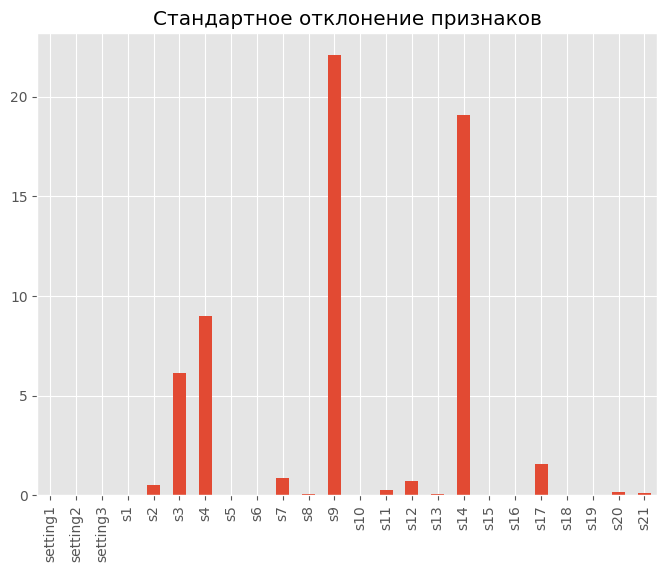

In [7]:
# Определим стандартное отклонение признаков по каждому параметру:

df_train[features].std().plot(kind='bar', figsize=(8, 6), title='Стандартное отклонение признаков')

In [8]:
df_num = pd.DataFrame()
df_num['id'] = df_train['id']
df_num['index'] = df_num.index

np.random.seed(1234)
df_num['int'] = np.random.randint(0, 100, len(df_num['id']))
df_num['float'] = np.random.uniform(0, 100, len(df_num['id']))
df_num = df_num[['index', 'id', 'int', 'float']]

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
df_num

,index,id,int,float
0,0,1,47,62.295093
1,1,1,83,97.101632
2,2,1,38,74.081637
3,3,1,53,61.891733
4,4,1,76,37.188878
...,...,...,...,...
20626,20626,100,31,40.441705
20627,20627,100,63,35.112457
20628,20628,100,19,26.182042
20629,20629,100,94,11.552807
